In [1]:
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

p = Path("../reports/metrics.json")
if not p.exists():
    raise FileNotFoundError("Run eval first: python -m src.cli.main eval --mode proxy")

m = json.loads(p.read_text(encoding="utf-8"))
m["mode"]

'proxy'

In [2]:
print("Detection")
print("  mode:", m["detection"]["mode"])
print("  n_evaluated:", m["detection"]["n_evaluated"])
print("  macro_f1:", round(m["detection"]["macro_f1"], 4))
print("  weighted_f1:", round(m["detection"]["weighted_f1"], 4))

print("\\nMapping")
print("  mode:", m["mapping"]["mode"])
if m["mapping"]["mode"] == "labeled":
    print("  top1_accuracy:", round(m["mapping"]["top1_accuracy"], 4))
    print("  top3_accuracy:", round(m["mapping"]["top3_accuracy"], 4))
    print("  recall@k:", round(m["mapping"]["retrieval_recall_at_k"]["value"], 4))
else:
    print("  tactic_alignment_top1:", round(m["mapping"]["tactic_alignment_top1"], 4))
    print("  tactic_alignment_top3:", round(m["mapping"]["tactic_alignment_top3"], 4))
    print("  avg_confidence:", round(m["mapping"]["avg_confidence"], 4))

Detection
  mode: proxy
  n_evaluated: 10865
  macro_f1: 0.7328
  weighted_f1: 0.7508
\nMapping
  mode: proxy
  tactic_alignment_top1: 0.002
  tactic_alignment_top3: 0.1328
  avg_confidence: 0.5486


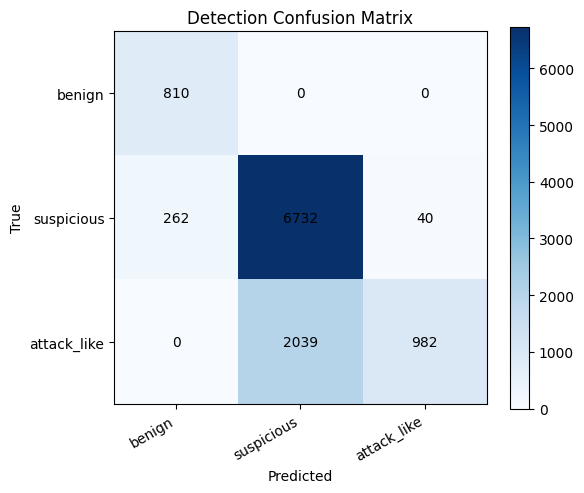

In [3]:
labels = m["detection"]["label_order"]
cm = np.array(m["detection"]["confusion_matrix"])

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, cmap="Blues")
fig.colorbar(im, ax=ax)
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=30, ha="right")
ax.set_yticklabels(labels)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Detection Confusion Matrix")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(int(cm[i, j])), ha="center", va="center")
plt.tight_layout()
plt.show()